# Activity: Regression and Classification


In this activity we will be analyzing the iris flower dataset. This dataset contains categorical and continuous variables that we will be exploring. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# We will be using the Linear Regression function and kNN function from SKLearn.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import the data and convert to a pandas dataframe
from sklearn import datasets
iris = datasets.load_iris()

# Formatting the iris dataframe
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df = iris_df.rename(index=str, columns={"sepal length (cm)":"sepallengthcm",
                                             "sepal width (cm)":"sepalwidthcm",
                                             "petal length (cm)":"petallengthcm",
                                             "petal width (cm)":"petalwidthcm"})
iris_df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Example 1: Simple Linear Regression

Linear Regression tries to best fit a line (linear model) to the data set by adjusting a set of parameters in order to minimize the sum of the squared residuals. The linear model provides an equation to make predictions on unseen values. 

Linear models can be expressed as the following equation:

$$y = X\beta + \epsilon$$

**Where**:

 - $X$: The independent variable (the predictor).
 - $y$: The dependent variable (the prediction).
 - $\beta$: Coefficients (slope of the line).
 - $\epsilon$: Observation noise (the intercept).

First, let's plot petal length vs. petal width using a scatter plot, and colour by species. This will help us visualize the data we're working with.

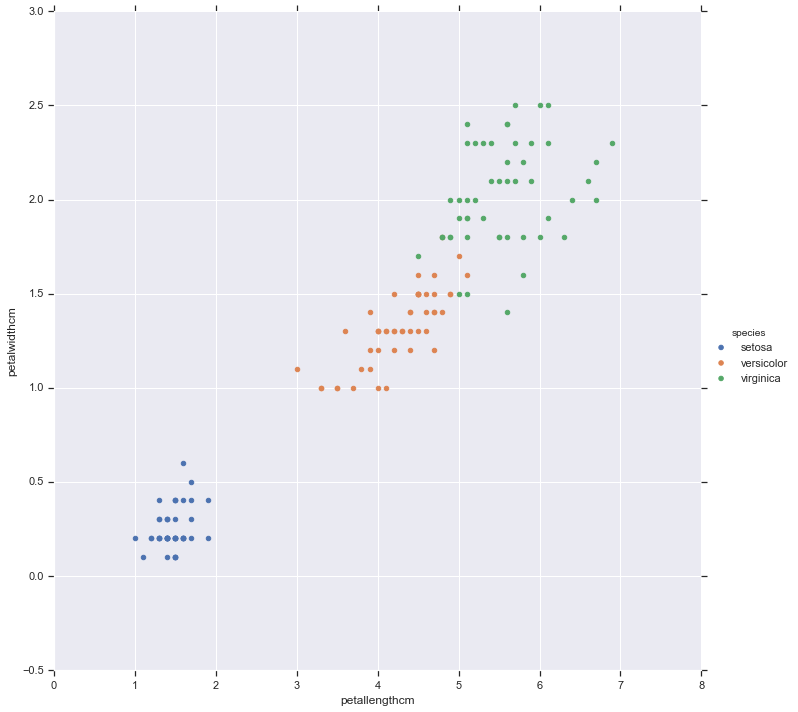

In [2]:
# Plot 1
sns.FacetGrid(data = iris_df, hue = 'species', height = 10).\
                   map(plt.scatter, 'petallengthcm',
                   'petalwidthcm').add_legend()

We can see that there is a positive trend in this data. As petal width increases, petal length also increases. To model this relationship, I will create a linear model for petal length vs. petal width.

In [15]:
# Create linear regression object
lm = LinearRegression()

# Fit the model using all the data. X = 'petallengthcm', Y = 'petalwidthcm'.
model = lm.fit(X = iris_df['petallengthcm'].values.reshape(-1,1), y = iris_df['petalwidthcm'])

# Linear model coefficient (the slope of the line)
lm_coef = model.coef_[0]

# Linear model y-intercept
lm_intercept = model.intercept_

print("Linear model coefficient:", lm_coef)
print("Linear model intercept:", lm_intercept)

Linear model coefficient: 0.416419132285
Linear model intercept: -0.366514045217


Now that we have the slope and the intercept of the fitted line, we can plot it against all three species categories.

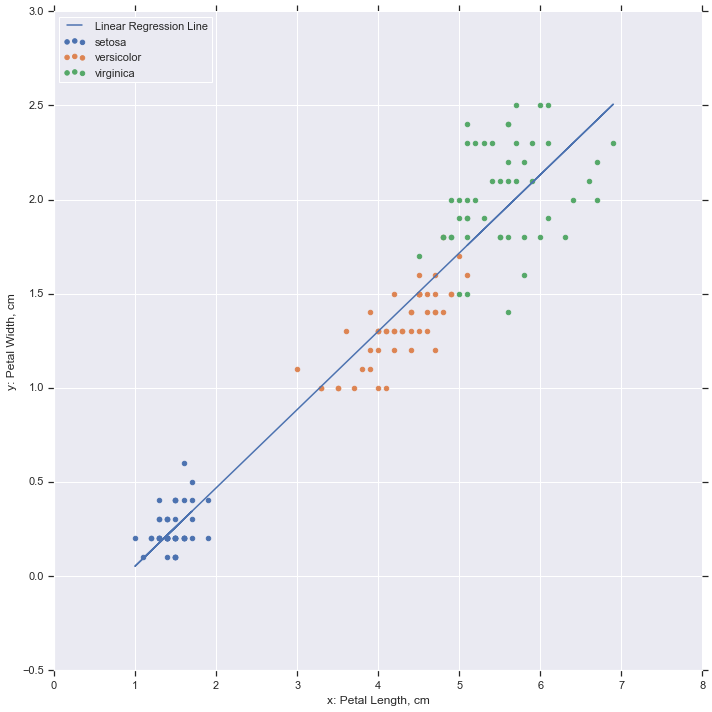

In [4]:
# Plot 2
# Scatter plot
sns.FacetGrid(data = iris_df, hue = 'species', height = 10).\
                   map(plt.scatter, 'petallengthcm',
                   'petalwidthcm')

# Add linear model    
plt.plot(iris_df['petallengthcm'], 
         (iris_df['petallengthcm'] * lm_coef + lm_intercept), 
         'b', 
         label='Linear Regression Line')

# Label axis
plt.ylabel('y: Petal Width, cm')
plt.xlabel('x: Petal Length, cm')
plt.legend(loc='upper left')
plt.show()

With the above linear model, it is now possible to make predictions for petal width and petal length that are outside of the existing boundary. Let's say we wanted to make an estimate for petal width when petal length is 3cm. We can figure this out through our linear model expression:

$$y = X\beta + \epsilon$$
$$y = (3cm * 0.416) - 0.366$$
$$y = 0.8827cm$$

$$petalwidthcm = 0.8827cm$$

In [16]:
# Using the predict function:
print('Using the prediction function:',lm.predict(3))
print('Using the expression',lm_coef*3 + lm_intercept)

Using the prediction function: [ 0.88274335]
Using the expression 0.882743351639


## Question 1: Mean by species  

A) Plot the mean sepal width for each species using boxplots.  
B) Plot the mean sepal length for each species using boxplots.  
C) Plot the mean petal width for each species using boxplots.  
D) Plot the mean petal length for each species using boxplots.  
E) What observations/conclusions can be made from these plots? 

Hint: sns.boxplot(x='species', y='???', data=iris_df)

## Question 2: Linear Model by species  
Use the Example 1 as reference.  

A) Plot a linear model for the Setosa species.  
B) Plot a linear model for the Veriscolour species.  
C) Plot a linear model for the Virginica species.  

## Question 3: Coefficients by species  

A) What is the value of $\beta$ and $\epsilon$ of the linear model for the Setosa species?  
B) What is the value of $\beta$ and $\epsilon$ of the linear model for the Veriscolour species?  
C) What is the value of $\beta$ and $\epsilon$ of the linear model for the Virginica species?  

## Question 4: Predictions

A) Given that a Veriscolour flower has a petal length of 6cm, what is the estimated petal width?  
B) Given that a Setosa flower has a petal width of 0.7cm, what is the estimated petal length?  

## Bonus:

What is a residual?  
 

# Example 2: k-Nearest Neighbors Classification

k-Nearest Neighbors is one of the most simple classification methods. An observation is classified as by the most common vote of the observations neighbors. For example, if k=1, then the observation takes on the classification of the closest neighbor.  
 
As seen in the table below, various continuous variables (petal width, petal length, etc.) are associated with a discrete label (species). 

In [5]:
iris_df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
iris_df.tail()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


Given some characteristics about a flower, we wish to classify what species of flower is most likely. To test this, we will divide the data into a testing and training set. This will allow us to train our model on the training data, and test the accuracy of the model on the testing data.

Note: Make sure that the model is not trained on the testing data. 

In [7]:
# Split the data into a testing and training set so we can test the model accuracy.
X_train, X_test, Y_train, Y_test = train_test_split(
        iris_df.loc[:, ['petallengthcm', 'petalwidthcm']], # Independent variables
        iris_df.loc[:, 'species']) # Independent variable

print('Training set length: {}.\nTest set length: {}'.format(X_train.shape[0], X_test.shape[0]))

Training set length: 112.
Test set length: 38


__Accuracy__: The amount of correct classifications / the total amount of classifications.  
__Training Accuracy__: The accuracy of a model on observations it was trained on.  
__Test Accuracy__: The accuracy of a model on observations it hasn't seen.  

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

print ("Training Accuracy {}".format(knn.score(X_train, Y_train)))
print ("Testing Accuracy {}".format(knn.score(X_test, Y_test)))

Training Accuracy 0.9821428571428571
Testing Accuracy 1.0


Now, we will try making a prediction on some made-up observation

In [9]:
category = knn.predict([[1.7,0.3]]) # Corresponds to 'petallengthcm', 'petalwidthcm'
prob = knn.predict_proba([[1.7,0.3]])
print('Flower type: {}.\nProbability distribution among categories : {}'.format(category, prob))

Flower type: ['setosa'].
Probability distribution among categories : [[ 1.  0.  0.]]


## Question 5:  Using the fitted model

A) What type of flower has a petal length of 5cm and petal width of 2cm? What is the probability distribution?  
B) What type of flower has a petal length of 4cm and petal width of 1.5cm? What is the probability distribution?  

Hint: Plot a scatterplot to visualize

## Question 6: Retraining the model

A) What type of flower has a sepal length of 6cm and sepal width of 3cm? What is the probability distribution?  
B) What type of flower has a sepal length of 4.5cm and sepal width of 3cm? What is the probability distribution?  
C) What is the testing and training accuracy?  
D) Change the value of k to 10. How does this change the model? What are the new testing and training accuracy scores?

# Congrats! That's the end of the activity!